In [97]:
import matplotlib.pyplot as plt
import numpy as np

In [98]:
Data_Path = '../Datasets/'

with open(Data_Path  + 'astral-scopedom-seqres-gd-sel-gs-bib-40-2.07.fa','r') as f:
    lines = f.readlines()
    len_lines = len(lines)

### Statistics of all the proteins: ###

In [99]:
pro_num = 0
sequence_num = 0
length_dict = {}
fold_dict = {}
class_dict = {}

multi_chain_num = 0

for i in range(len_lines):
    line = lines[i]
    if line[0] == '>':
        pro_num += 1
        if i != 0:
            
            seq_list = seq.split('X')
            seq_num = len(seq_list)
            
            sequence_num += seq_num
            
            if seq_num >= 2:
                multi_chain_num += 1
                
            if not clas in class_dict.keys():
                class_dict[clas] = [1,seq_num]
            else:
                class_dict[clas][0] += 1
                class_dict[clas][1] += seq_num
                
            if not fold in fold_dict.keys():
                fold_dict[fold] = [1,seq_num]
            else:
                fold_dict[fold][0] += 1
                fold_dict[fold][1] += seq_num
            
            for se in seq_list:
                length = len(se)
            
                if not length in length_dict.keys():
                    length_dict[length] = 1
                else:
                    length_dict[length] += 1
                
        fold = line.split(' ')[1]
        fold = '.'.join(fold.split('.')[0:2])
        clas = fold[0]
        seq = ''
    else:
        seq += line.strip('\n')

seq_list = seq.split('X')
seq_num = len(seq_list)
if seq_num >= 2:
    multi_chain_num += 1
    
if not clas in class_dict.keys():
    class_dict[clas] = [1,seq_num]
else:
    class_dict[clas][0] += 1
    class_dict[clas][1] += seq_num   
        
if not fold in fold_dict.keys():
    fold_dict[fold] = [1,seq_num]
else:
    fold_dict[fold][0] += 1
    fold_dict[fold][1] += seq_num

for se in seq_list:    
    length = len(se)

    if not length in length_dict.keys():
        length_dict[length] = 1
    else:
        length_dict[length] += 1

In [100]:
print('Protein Amount: %d'%pro_num)
print('Sequence Amount: %d'%sequence_num)
print('Fold Amount: %d'%len(fold_dict.keys()))
print('Class Amount: %d'%len(class_dict.keys()))
print('Amount of proteins with multi-chains: %d'%multi_chain_num)
print()
print('Minimum Sequence Length: %d'%min(length_dict.keys()))
print('Maximum Sequence Length: %d'%max(length_dict.keys()))

Protein Amount: 14323
Sequence Amount: 14665
Fold Amount: 1232
Class Amount: 7
Amount of proteins with multi-chains: 331

Minimum Sequence Length: 6
Maximum Sequence Length: 1664


Protein amount of different classes:


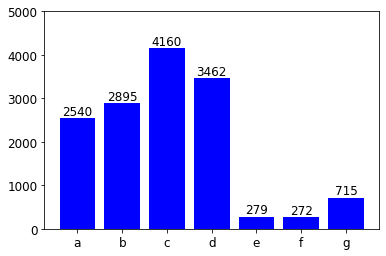

Sequence amount of different classes:


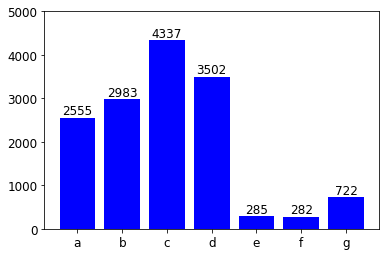

In [101]:
print ('Protein amount of different classes:')

cla_pro_num_list = [i[0] for i in class_dict.values()]
plt.figure(1)
plt.ylim([0,5000])
plt.tick_params(labelsize=12)
plt.bar(range(7),cla_pro_num_list,color='blue',tick_label=list(class_dict.keys()))
for a,b in zip(range(7),cla_pro_num_list):
    plt.text(a,b+5,'%d'%b,ha='center',va='bottom',fontsize=12)
plt.show()

print ('Sequence amount of different classes:')

cla_seq_num_list = [i[1] for i in class_dict.values()]
plt.figure(2)
plt.ylim([0,5000])
plt.tick_params(labelsize=12)
plt.bar(range(7),cla_seq_num_list,color='blue',tick_label=list(class_dict.keys()))
for a,b in zip(range(7),cla_seq_num_list):
    plt.text(a,b+5,'%d'%b,ha='center',va='bottom',fontsize=12)
plt.show()

Protein amount of different folds:


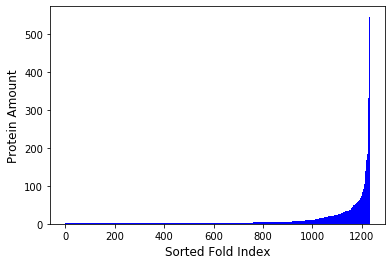

Sequence amount of different folds:


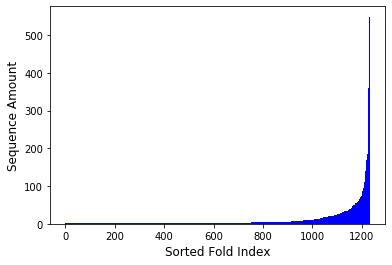

In [102]:
print ('Protein amount of different folds:')

fold_pro_num_list = [i[0] for i in fold_dict.values()]
plt.figure(1)
plt.bar(range(len(fold_dict.keys())),sorted(fold_pro_num_list),color='blue',width=1)
plt.xlabel('Sorted Fold Index',fontsize=12)
plt.ylabel('Protein Amount',fontsize=12)
plt.show()

print ('Sequence amount of different folds:')

fold_seq_num_list = [i[1] for i in fold_dict.values()]
plt.figure(2)
plt.bar(range(len(fold_dict.keys())),sorted(fold_seq_num_list),color='blue',width=1)
plt.xlabel('Sorted Fold Index',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

Sequence amount of different lengths:


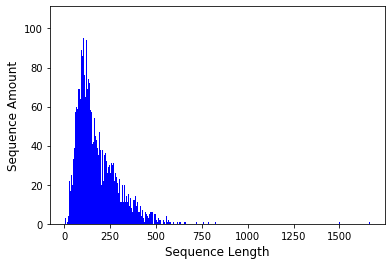

In [103]:
print ('Sequence amount of different lengths:')

plt.figure()
#plt.ylim([0,4500])
plt.bar(length_dict.keys(),length_dict.values(),color='blue',width=1)
plt.xlabel('Sequence Length',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

Sequence Length Distribution:


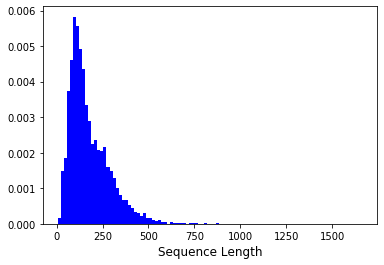

In [104]:
length_list = []
for l in length_dict.keys():
    for n in range(length_dict[l]):
        length_list.append(l)
        
print('Sequence Length Distribution:')

plt.figure()
plt.hist(length_list,bins=100,color='blue',density=True)
plt.xlabel('Sequence Length',fontsize=12)
plt.show()

### Statistics of proteins with single chain: ###

In [105]:
sequence_single_num = 0
length_single_dict = {}
fold_single_dict = {}
class_single_dict = {}

for i in range(len_lines):
    line = lines[i]
    if line[0] == '>':
        if i != 0:           
            if not 'X' in seq:
                
                sequence_single_num += 1
                
                if not clas in class_single_dict.keys():
                    class_single_dict[clas] = 1
                else:
                    class_single_dict[clas] += 1
                
                if not fold in fold_single_dict.keys():
                    fold_single_dict[fold] = 1
                else:
                    fold_single_dict[fold] += 1

                length = len(seq)
            
                if not length in length_single_dict.keys():
                    length_single_dict[length] = 1
                else:
                    length_single_dict[length] += 1
        
        pro_name = line.split(' ')[0].strip('>')
        
        fold = line.split(' ')[1]
        fold = '.'.join(fold.split('.')[0:2])
        clas = fold[0]
        seq = ''
    else:
        seq += line.strip('\n')

if not 'X' in seq:
    
    sequence_single_num += 1
    
    if not clas in class_single_dict.keys():
        class_single_dict[clas] = 1,
    else:
        class_single_dict[clas] += 1
        
    if not fold in fold_single_dict.keys():
        fold_single_dict[fold] = 1
    else:
        fold_single_dict[fold] += 1
    
    length = len(seq)

    if not length in length_single_dict.keys():
        length_single_dict[length] = 1
    else:
        length_single_dict[length] += 1

In [106]:
print('For single-chain proteins:')
print('Sequence Amount: %d'%sequence_single_num)
print('Fold Amount: %d'%len(fold_single_dict.keys()))
print('Class Amount: %d'%len(class_single_dict.keys()))
print()
print('Minimum Sequence Length: %d'%min(length_single_dict.keys()))
print('Maximum Sequence Length: %d'%max(length_single_dict.keys()))

For single-chain proteins:
Sequence Amount: 13992
Fold Amount: 1220
Class Amount: 7

Minimum Sequence Length: 20
Maximum Sequence Length: 1664


Single-chain protein amount of different classes:


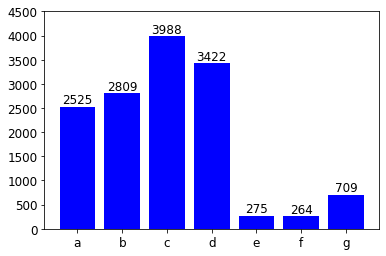

Single-chain protein amount of different folds:


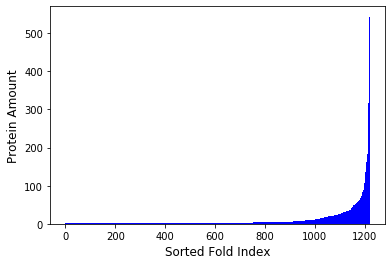

Sequence amount of different lengths:


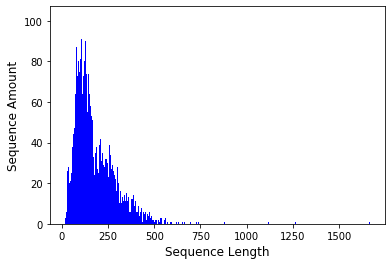

In [107]:
print('Single-chain protein amount of different classes:')

plt.figure(1)
plt.ylim([0,4500])
plt.tick_params(labelsize=12)
plt.bar(range(7),class_single_dict.values(),color='blue',tick_label=list(class_single_dict.keys()))
for a,b in zip(range(7),class_single_dict.values()):
    plt.text(a,b+5,'%d'%b,ha='center',va='bottom',fontsize=12)
plt.show()

print ('Single-chain protein amount of different folds:')

plt.figure(2)
plt.bar(range(len(fold_single_dict.keys())),sorted(fold_single_dict.values()),color='blue',width=1)
plt.xlabel('Sorted Fold Index',fontsize=12)
plt.ylabel('Protein Amount',fontsize=12)
plt.show()

print ('Sequence amount of different lengths:')

plt.figure(3)
plt.bar(length_single_dict.keys(),length_single_dict.values(),color='blue',width=1)
plt.xlabel('Sequence Length',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

### Statistics of sequences with a length less than or equal to 512 ###

In [108]:
sequence_SS_num = 0
length_SS_dict = {}
fold_SS_dict = {}
class_SS_dict = {}

fold_SS_pro_dict = {}

for i in range(len_lines):
    line = lines[i]
    if line[0] == '>':
        if i != 0:      
            
            length = len(seq)
            
            if not 'X' in seq and length <= 512:
                
                sequence_SS_num += 1
                
                if not clas in class_SS_dict.keys():
                    class_SS_dict[clas] = 1
                else:
                    class_SS_dict[clas] += 1
                
                if not fold in fold_SS_dict.keys():
                    fold_SS_dict[fold] = 1
                    fold_SS_pro_dict[fold] = [pro_name]
                else:
                    fold_SS_dict[fold] += 1
                    fold_SS_pro_dict[fold].append(pro_name)
            
                if not length in length_SS_dict.keys():
                    length_SS_dict[length] = 1
                else:
                    length_SS_dict[length] += 1
        
        pro_name = line.split(' ')[0].strip('>')
        
        fold = line.split(' ')[1]
        fold = '.'.join(fold.split('.')[0:2])
        clas = fold[0]
        seq = ''
    else:
        seq += line.strip('\n')

length = len(seq)
        
if not 'X' in seq and length <= 512:
    
    sequence_SS_num += 1
    
    if not clas in class_SS_dict.keys():
        class_SS_dict[clas] = 1,
    else:
        class_SS_dict[clas] += 1
        
    if not fold in fold_SS_dict.keys():
        fold_SS_dict[fold] = 1
        fold_SS_pro_dict[fold] = [pro_name]
    else:
        fold_SS_dict[fold] += 1
        fold_SS_pro_dict[fold].append(pro_name)

    if not length in length_SS_dict.keys():
        length_SS_dict[length] = 1
    else:
        length_SS_dict[length] += 1

In [109]:
print('For single-chain proteins (length less than or equal to 512):')
print('Sequence Amount: %d'%sequence_SS_num)
print('Fold Amount: %d'%len(fold_SS_dict.keys()))
print('Class Amount: %d'%len(class_SS_dict.keys()))
print()
print('Minimum Sequence Length: %d'%min(length_SS_dict.keys()))
print('Maximum Sequence Length: %d'%max(length_SS_dict.keys()))

For single-chain proteins (length less than or equal to 512):
Sequence Amount: 13814
Fold Amount: 1206
Class Amount: 7

Minimum Sequence Length: 20
Maximum Sequence Length: 512


Single-chain protein amount of different classes (length-filtered):


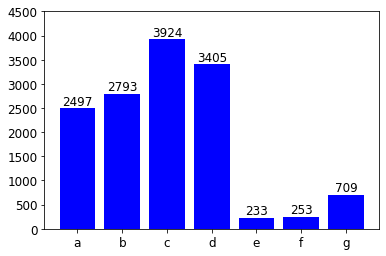

Single-chain protein amount of different folds (length-filtered):


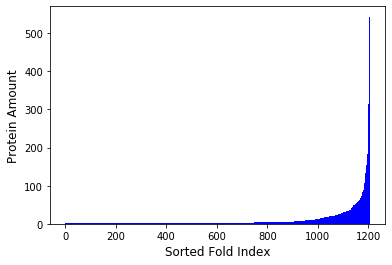

Sequence amount of different lengths:


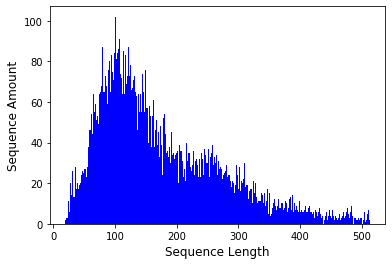

In [110]:
print('Single-chain protein amount of different classes (length-filtered):')

plt.figure(1)
plt.ylim([0,4500])
plt.tick_params(labelsize=12)
plt.bar(range(7),class_SS_dict.values(),color='blue',tick_label=list(class_SS_dict.keys()))
for a,b in zip(range(7),class_SS_dict.values()):
    plt.text(a,b+5,'%d'%b,ha='center',va='bottom',fontsize=12)
plt.show()

print ('Single-chain protein amount of different folds (length-filtered):')

plt.figure(2)
plt.bar(range(len(fold_SS_dict.keys())),sorted(fold_SS_dict.values()),color='blue',width=1)
plt.xlabel('Sorted Fold Index',fontsize=12)
plt.ylabel('Protein Amount',fontsize=12)
plt.show()

print ('Sequence amount of different lengths:')

plt.figure(3)
plt.bar(length_SS_dict.keys(),length_SS_dict.values(),color='blue',width=1)
plt.xlabel('Sequence Length',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

In [111]:
import pickle

with open(Data_Path  + 'fold_protein_dict.pickle', 'wb') as handle:
    pickle.dump(fold_SS_pro_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Statistics of data for Seq-Structure Models: ###

In [112]:
print('Folds amount with only one sequence: %d'%list(fold_SS_dict.values()).count(1))
print('Folds amount with only two sequences: %d'%list(fold_SS_dict.values()).count(2))
print('Folds amount with only three sequences: %d'%list(fold_SS_dict.values()).count(3))

Folds amount with only one sequence: 460
Folds amount with only two sequences: 186
Folds amount with only three sequences: 103


Sequence amount after reduction: 12982
Fold amount after reduction: 560

Sequence amount of different classes after reduction:


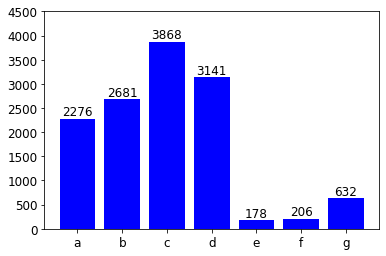

Sequence amount of different folds after reduction:


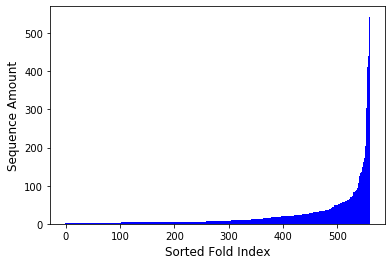

In [113]:
fold_dict_simple = {}
class_dict_simple = {'a':0,'b':0,'c':0,'d':0,'e':0,'f':0,'g':0}
fold_pro_dict_simple = {}

for f in fold_SS_dict:
    f_value = fold_SS_dict[f]
    if f_value >= 3:
        fold_dict_simple[f] = f_value
        fold_pro_dict_simple[f] = fold_SS_pro_dict[f]
        class_dict_simple[f[0]] += f_value
        
print('Sequence amount after reduction: %d'%sum(fold_dict_simple.values()))
print('Fold amount after reduction: %d'%len(fold_dict_simple.keys()))
print()
print('Sequence amount of different classes after reduction:')

with open(Data_Path  + 'fold_protein_dict_reduced.pickle', 'wb') as handle:
    pickle.dump(fold_pro_dict_simple, handle, protocol=pickle.HIGHEST_PROTOCOL)

plt.figure(1)
plt.ylim([0,4500])
plt.tick_params(labelsize=12)
plt.bar(range(7),class_dict_simple.values(),color='blue',tick_label=list(class_dict_simple.keys()))
for a,b in zip(range(7),class_dict_simple.values()):
    plt.text(a,b+5,'%d'%b,ha='center',va='bottom',fontsize=12)
plt.show()

print ('Sequence amount of different folds after reduction:')

plt.figure(2)
#plt.ylim([0,4500])
plt.bar(range(len(fold_dict_simple.keys())),sorted(fold_dict_simple.values()),color='blue',width=1)
plt.xlabel('Sorted Fold Index',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

In [114]:
length_dict_simple = {}
fold = ''

for i in range(len_lines):
    line = lines[i]
    if line[0] == '>':
        num += 1
        length = len(seq)
        
        if (i != 0) and (fold in fold_dict_simple.keys()) and length <= 512:
            
            if not length in length_dict_simple.keys():
                length_dict_simple[length] = 1
            else:
                length_dict_simple[length] += 1
                
        fold = line.split(' ')[1]
        fold = '.'.join(fold.split('.')[0:2])
        seq = ''
    else:
        seq += line.strip('\n')

length = len(seq)
    
if fold in fold_dict_simple.keys() and length <= 512:

    if not length in length_dict.keys():
        length_dict_simple[length] = 1
    else:
        length_dict_simple[length] += 1

In [ ]:
print('Minimum Sequence Length after reduction: %d'%min(length_dict_simple.keys()))
print('Maximum Sequence Length after reduction: %d'%max(length_dict_simple.keys()))
print()
print ('Sequence amount of different lengths after reduction:')

plt.figure(1)
#plt.ylim([0,4500])
plt.bar(length_dict_simple.keys(),length_dict_simple.values(),color='blue',width=1)
plt.xlabel('Sequence Length',fontsize=12)
plt.ylabel('Sequence Amount',fontsize=12)
plt.show()

length_list_simple = []
for l in length_dict_simple.keys():
    for n in range(length_dict_simple[l]):
        length_list_simple.append(l)
        
print('Sequence length distribution after reduction:')

plt.figure(2)
plt.hist(length_list_simple,bins=100,color='blue',density=True)
plt.xlabel('Sequence Length',fontsize=12)
plt.show()